
===== Expense Tracker =====
1. Add Expense
2. Category Summary
3. Monthly Report
4. Visualize Expenses
5. Exit
Enter your choice: 1
Enter date (YYYY-MM-DD) or press Enter for today: 
Enter category (Food, Travel, Rent, etc.): food
Enter amount: 500
Enter description: mushroom, mocroni, brocli, corn


/tmp/ipython-input-3683692179.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)


✅ Expense added successfully!

===== Expense Tracker =====
1. Add Expense
2. Category Summary
3. Monthly Report
4. Visualize Expenses
5. Exit
Enter your choice: 4


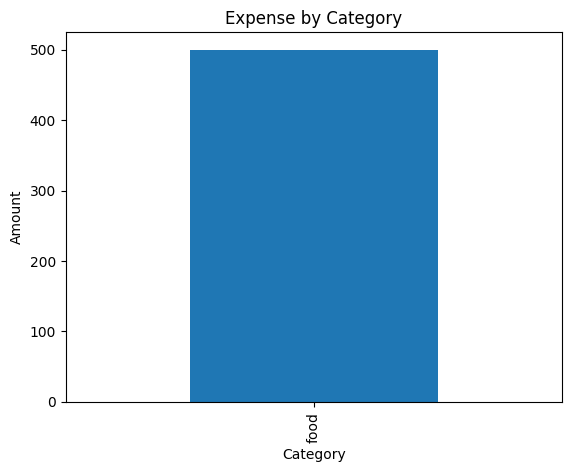


===== Expense Tracker =====
1. Add Expense
2. Category Summary
3. Monthly Report
4. Visualize Expenses
5. Exit
Enter your choice: foof
❌ Invalid choice

===== Expense Tracker =====
1. Add Expense
2. Category Summary
3. Monthly Report
4. Visualize Expenses
5. Exit
Enter your choice: 5
👋 Exiting... Goodbye!


In [1]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

FILE_NAME = "expenses.csv"


def initialize_file():
    if not os.path.exists(FILE_NAME):
        df = pd.DataFrame(columns=["Date", "Category", "Amount", "Description"])
        df.to_csv(FILE_NAME, index=False)

def add_expense():
    date = input("Enter date (YYYY-MM-DD) or press Enter for today: ")
    if date == "":
        date = datetime.today().strftime("%Y-%m-%d")

    category = input("Enter category (Food, Travel, Rent, etc.): ")
    amount = float(input("Enter amount: "))
    description = input("Enter description: ")

    new_data = {
        "Date": date,
        "Category": category,
        "Amount": amount,
        "Description": description
    }

    df = pd.read_csv(FILE_NAME)
    df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)
    df.to_csv(FILE_NAME, index=False)

    print("✅ Expense added successfully!")

def category_summary():
    df = pd.read_csv(FILE_NAME)
    if df.empty:
        print("No expenses found.")
        return

    summary = df.groupby("Category")["Amount"].sum()
    print("\n📊 Category Summary:")
    print(summary)

def monthly_report():
    df = pd.read_csv(FILE_NAME)
    if df.empty:
        print("No expenses found.")
        return

    df["Date"] = pd.to_datetime(df["Date"])
    month = input("Enter month (YYYY-MM): ")

    filtered = df[df["Date"].dt.strftime("%Y-%m") == month]

    if filtered.empty:
        print("No data for this month.")
        return

    print("\n📅 Monthly Report:")
    print(filtered)
    print("\nTotal Expense:", filtered["Amount"].sum())


def visualize_expenses():
    df = pd.read_csv(FILE_NAME)
    if df.empty:
        print("No expenses found.")
        return

    summary = df.groupby("Category")["Amount"].sum()
    summary.plot(kind="bar")
    plt.title("Expense by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.show()

def menu():
    initialize_file()

    while True:
        print("\n===== Expense Tracker =====")
        print("1. Add Expense")
        print("2. Category Summary")
        print("3. Monthly Report")
        print("4. Visualize Expenses")
        print("5. Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            add_expense()
        elif choice == "2":
            category_summary()
        elif choice == "3":
            monthly_report()
        elif choice == "4":
            visualize_expenses()
        elif choice == "5":
            print("👋 Exiting... Goodbye!")
            break
        else:
            print("❌ Invalid choice")
menu()
